# "Global Happiness: Exploring Factors that Shape Well-being"
#### Stella Wroblewski
[Link to my GitHub webpage](https://swroblewski-tu.github.io/)

If running the notebook, please download the csv for the datasets linked below 

## Project Questions


1. Main Research Question:
How do socio-economic factors, quality of life indices, and dietary patterns contribute to the subjective well- being of individuals in different countries?

2. Happiness and Quality of Life:
To what extent does the Quality of Life Index align with reported happiness scores in different countries?
How do specific quality of life indicators (e.g., purchasing power, safety, healthcare) correlate with reported happiness?

3. Correlation between Quality of Life and Cost of Living:
What is the relationship between Quality of Life and Cost of Living, and how does it vary among countries?

4. Feature Importance for Happiness Prediction:
Which features contribute the most to the prediction of Happiness Scores, and how do these align with conventional wisdom or societal expectations?

5. Clustering and Regional Patterns:
Are there discernible regional patterns in happiness and quality of life indices, and how are these influenced by socio-economic and food-related factors?

6. Impact of Dietary Patterns on Happiness:
To what extent do different diets, such as Mediterranean or vegetarian, impact reported happiness scores?
Can specific food-related variables from the dataset be identified as significant predictors of happiness?


## Project Datasets


### Diet by country



[Link to FAO food balance data](https://www.fao.org/faostat/en/#data/FBS)

[Link to FAO food balance data CSV (2019_food_data.csv)](https://github.com/swroblewski-tu/swroblewski-tu.github.io)

This dataset comes from the Food and Agriculture Organization of the United Nations. This data is collected every year and has been cited in numerous academic studies as well as National Geographic as a way to understand food consumption by country. For the scope of this project we will only be using the 2019 data. All data has been previously normalized to population. The main measure in this dataset that will be used is food supply quantity (how much of a certain food is in the food supply by weight). The data also divides into categories of where the food is going such as livestock, waste, seed for new crops, tourists, etc. 


### Quality of Life by country



[Link to Quality of Life data](https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019)

This dataset comes from the website numbeo is the largest database of crowdsourced information regarding cost of living and quality of life. Because of the crowd sourcing nature of the data, there is a much wider scope of the countries included compared to other sources. For the scope of this project we will only be using the 2019 data. A description of the metrics used taken from the website orginally can be found below. 


"Quality of Life Index is an estimation of the overall quality of life in a city or country.It takes into account various factors that impact one's quality of life, including purchasing power, pollution levels, housing affordability, cost of living, safety, healthcare quality, commute times, and climate conditions. The index is designed to provide a comparative measure, where a higher index value indicates a better quality of life.

It's important to note that the Quality of Life Index is based on data and user surveys collected by Numbeo. The surveys capture the perceptions and experiences of visitors to the website regarding various aspects of quality of life. Numbeo strives to provide accurate and up-to-date information by filtering out potential spam and ensuring a sufficient number of contributors for each city or country.

The index is calculated using an empirical formula that assigns weights to each factor based on its importance. The specific formula used by Numbeo may vary and is subject to change. It combines the data collected for each factor to generate a numerical value that represents the quality of life in a particular location.

The Quality of Life Index (higher is better) is an estimation of the overall quality of life by using an empirical formula that takes into account the following factors:

Purchasing Power Index (higher is better)
Pollution Index (lower is better)
House Price to Income Ratio (lower is better)
Cost of Living Index (lower is better)
Safety Index (higher is better)
Health Care Index (higher is better)
Traffic Commute Time Index (lower is better)
Climate Index (higher is better)"

### Happiness by country



[Link to World Happiness Report](https://worldhappiness.report/ed/2019/#appendices-and-data)

[Link to World Happiness Report data](https://worldhappiness.report/data/)

[Link to World Happiness Report data CSV (2019_happiness_data.csv)](https://github.com/swroblewski-tu/swroblewski-tu.github.io)


This dataset comes from the "World Happiness Report". This data is collected every year and has been cited in numerous academic studies as a way to understand percieved happiness by country. For the scope of this project we will only be using the 2019 data. A description of the metrics used taken from the project orginally can be found below. 

"The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The World Happiness Report 2019 focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes."

## Proposed Models


1. Prediction Model with Expanded Features:
Build an enhanced happiness prediction model using a combination of socio-economic features, quality of life indices, and additional features from the food dataset (e.g., diet composition, food availability).
Objective: Understand how a broader set of features, including food-related variables, contributes to predicting happiness.

2. Food Impact Analysis Model:
Develop a model to analyze the impact of different diets on happiness scores, considering both quality of life indices and happiness data.
Objective: Investigate the relationship between dietary patterns and subjective well-being, providing insights into the role of food in happiness.

3. Regional Happiness Clustering with Food Factors:
Apply clustering algorithms to group countries based on happiness scores, quality of life indices, and food-related features.
Objective: Identify regional patterns in well-being, considering both socio-economic factors and dietary habits.

4. Causal Inference Analysis:
Apply causal inference techniques to investigate potential causal relationships between food-related variables and happiness, addressing confounding factors.
Objective: Explore whether changes in diet composition have a causal impact on happiness, considering potential interventions.



## Extracting and Loading Datasets

##### Import necessary libraries: 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


#### Extracting and Loading Quality of Life Dataset

##### Scrape/extract quality of life table data: 

In [2]:
import requests
from bs4 import BeautifulSoup
# fetch the url 
url = "https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# locate the table
table = soup.find('table', {'id': 't2'})

# extract the data from the table as needed
data = []
for row in table.find_all('tr')[1:]:  # skip the header row
    cols = row.find_all('td')
    country = cols[1].text.strip()
    quality_of_life_index = cols[2].text.strip()
    cost_of_living_index = cols[3].text.strip()
    property_price_to_income_ratio = cols[4].text.strip()
    traffic_commute_time_index = cols[5].text.strip()

    data.append([country, quality_of_life_index, cost_of_living_index,
                 property_price_to_income_ratio, traffic_commute_time_index])


##### Create pandas data frame and correct data types:

In [3]:
# create dataframe and tidy the data
qol_data = pd.DataFrame(data, columns=['Country', 'Quality of Life Index', 'Cost of Living Index',
                                     'Property Price to Income Ratio', 'Traffic Commute Time Index'])

# convert to appropriate data types
qol_data['Quality of Life Index'] = qol_data['Quality of Life Index'].astype(float)
qol_data['Cost of Living Index'] = qol_data['Cost of Living Index'].astype(float)
qol_data['Property Price to Income Ratio'] = qol_data['Property Price to Income Ratio'].astype(float)
qol_data['Traffic Commute Time Index'] = qol_data['Traffic Commute Time Index'].astype(float)


qol_data['Country'] = qol_data['Country'].replace({'United States': 'United States of America'})

print(qol_data.head())

       Country  Quality of Life Index  Cost of Living Index  \
0      Denmark                  198.6                 114.4   
1  Switzerland                  195.9                 129.7   
2      Finland                  194.0                 112.3   
3    Australia                  191.1                 122.9   
4      Austria                  191.1                  96.7   

   Property Price to Income Ratio  Traffic Commute Time Index  
0                            75.8                        79.4  
1                            78.5                        72.7  
2                            77.2                        73.5  
3                            57.2                        76.4  
4                            78.6                        79.2  


#### Extracting and Loading Happiness Dataset

In [4]:
import pycountry 

happiness_data = pd.read_csv("2019_happiness_data.csv")

def standardize_country_names(name):
    country = pycountry.countries.get(name=name)
    if country:
        return country.name
    for country in pycountry.countries:
        if name.lower() in country.name.lower():
            return country.name

    # return original name if no match was found
    return name
    
happiness_data['Country'] = happiness_data['Country'].apply(standardize_country_names)
qol_data['Country'] = qol_data['Country'].apply(standardize_country_names)

manual_mapping = {
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Taiwan Province of China' : 'Taiwan, Province of China'
}
# Apply the updated manual mapping to both datasets
happiness_data['Country'] = happiness_data['Country'].replace(manual_mapping)
qol_data['Country'] = qol_data['Country'].replace(manual_mapping)

# merge quality of life and happiness datasets
merged_data = pd.merge(happiness_data, qol_data, on='Country', how='left')

print(merged_data.head())

       Country  Happiness score  Whisker-high  Whisker-low  \
0      Finland            7.769         7.830        7.708   
1      Denmark            7.600         7.667        7.534   
2       Norway            7.554         7.616        7.492   
3      Iceland            7.494         7.613        7.374   
4  Netherlands            7.488         7.542        7.433   

   Dystopia (1.88) + residual  Explained by: GDP per capita  \
0                       2.714                         1.340   
1                       2.393                         1.383   
2                       2.241                         1.488   
3                       2.401                         1.380   
4                       2.393                         1.396   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.587                                  0.986   
1                         1.573                                  0.996   
2                         

#### Extracting and Loading Food Dataset

In [5]:
food_data = pd.read_csv("2019_food_data.csv")

manual_mapping = {
    # Existing mappings
    'Tanzania, United Republic of': 'United Republic of Tanzania',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Republic of Korea': 'South Korea',
    'Iran (Islamic Republic of)': 'Iran',
    'Czechia': 'Czech Republic',
    'Netherlands (Kingdom of the)' : 'Netherlands'
}


# Apply the updated manual mapping to both datasets
merged_data['Country'] = merged_data['Country'].replace(manual_mapping)
food_data['Area'] = food_data['Area'].replace(manual_mapping)

# Apply the standardization function to country columns
merged_data['Country'] = merged_data['Country'].apply(standardize_country_names)
food_data['Area'] = food_data['Area'].apply(standardize_country_names)

# Merge the datasets
final_merged_data = pd.merge(merged_data, food_data, left_on='Country', right_on='Area', how='inner')

## Exploratory Data Analysis (EDA)

### Find the top 5 countries with the highest quality of life scores:

In [6]:
import matplotlib.pyplot as plt

# find the top 5 countries with the highest QOL score
top_5_qol = qol_data.nlargest(5, 'Quality of Life Index')

# show top five QOL countries
print("Top 5 Countries with the Highest Quality of Life Index:")
top_5_qol[['Country', 'Quality of Life Index']]

Top 5 Countries with the Highest Quality of Life Index:


,Country,Quality of Life Index
0,Denmark,198.6
1,Switzerland,195.9
2,Finland,194.0
3,Australia,191.1
4,Austria,191.1


### Display initial summary statstics for the quality of life dataset

In [7]:
# find initial summary stats
summary_stats = qol_data.describe()

# show summary stats
print("\nSummary Statistics for Quality of Life Data:")
summary_stats[['Quality of Life Index']]


Summary Statistics for Quality of Life Data:


,Quality of Life Index
count,71.000000
mean,142.311268
std,32.931416
min,84.000000
25%,113.000000
50%,145.700000
75%,169.050000
max,198.600000


### Graph 1: the quality of life scores against cost of living. The scatter plot reveals a strong positive correlation between Quality of Life Index and Cost of Living Index. 

#### This correlation suggests that countries with higher Quality of Life tend to have higher costs of living. This may be attributed to better amenities, healthcare, and overall standards of living, which often come at a higher financial cost.

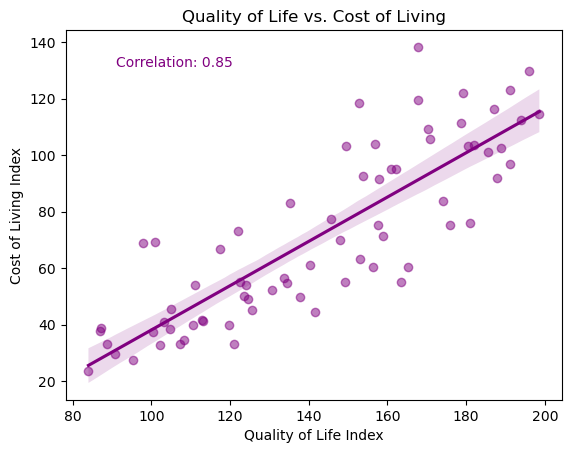

In [8]:
# scatter plot
plt.scatter(qol_data['Quality of Life Index'], qol_data['Cost of Living Index'], alpha=0.5, color='purple')
plt.title('Quality of Life vs. Cost of Living')
plt.xlabel('Quality of Life Index')
plt.ylabel('Cost of Living Index')

# regression line
sns.regplot(x='Quality of Life Index', y='Cost of Living Index', data=qol_data, scatter=False, color='purple')

# correlation
correlation = qol_data['Quality of Life Index'].corr(qol_data['Cost of Living Index'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10, color='purple')

plt.show()

### Graph 2: The scatter plot explores the relationship between Happiness Score and Quality of Life Index for different countries in 2019. Each point represents a country, and there's a visible positive correlation, suggesting that countries with higher Quality of Life tend to have higher Happiness Scores. 

#### The positive correlation implies that as the overall quality of life improves, citizens of that country are more likely to report higher levels of happiness. This aligns with the intuitive expectation that factors contributing to a better quality of life, such as healthcare, safety, and economic prosperity, positively influence the subjective well-being of individuals.

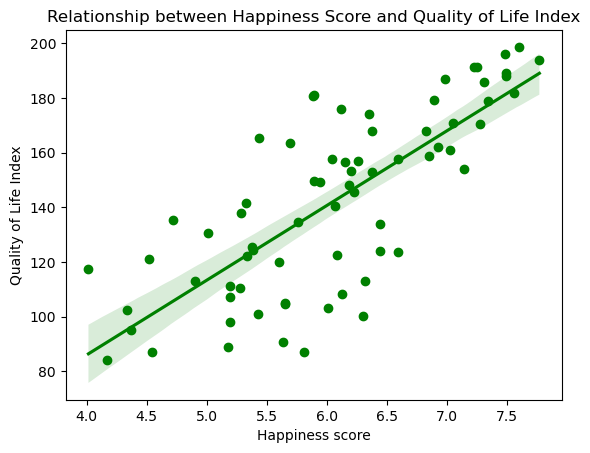

In [9]:
# scatter plot
plt.scatter(merged_data['Happiness score'], merged_data['Quality of Life Index'], color='green')
plt.title('Relationship between Happiness Score and Quality of Life Index')
plt.xlabel('Happiness Score')
plt.ylabel('Quality of Life Index')

# regression line
sns.regplot(x='Happiness score', y='Quality of Life Index', data=merged_data, scatter=False, color='green')

plt.show()

### Graph 3: The bar plot illustrates the importance of different features in predicting the Happiness Score
#### Features such as 'GDP per capita' and 'Social support' have higher importance values as you can see by the increased correlations.

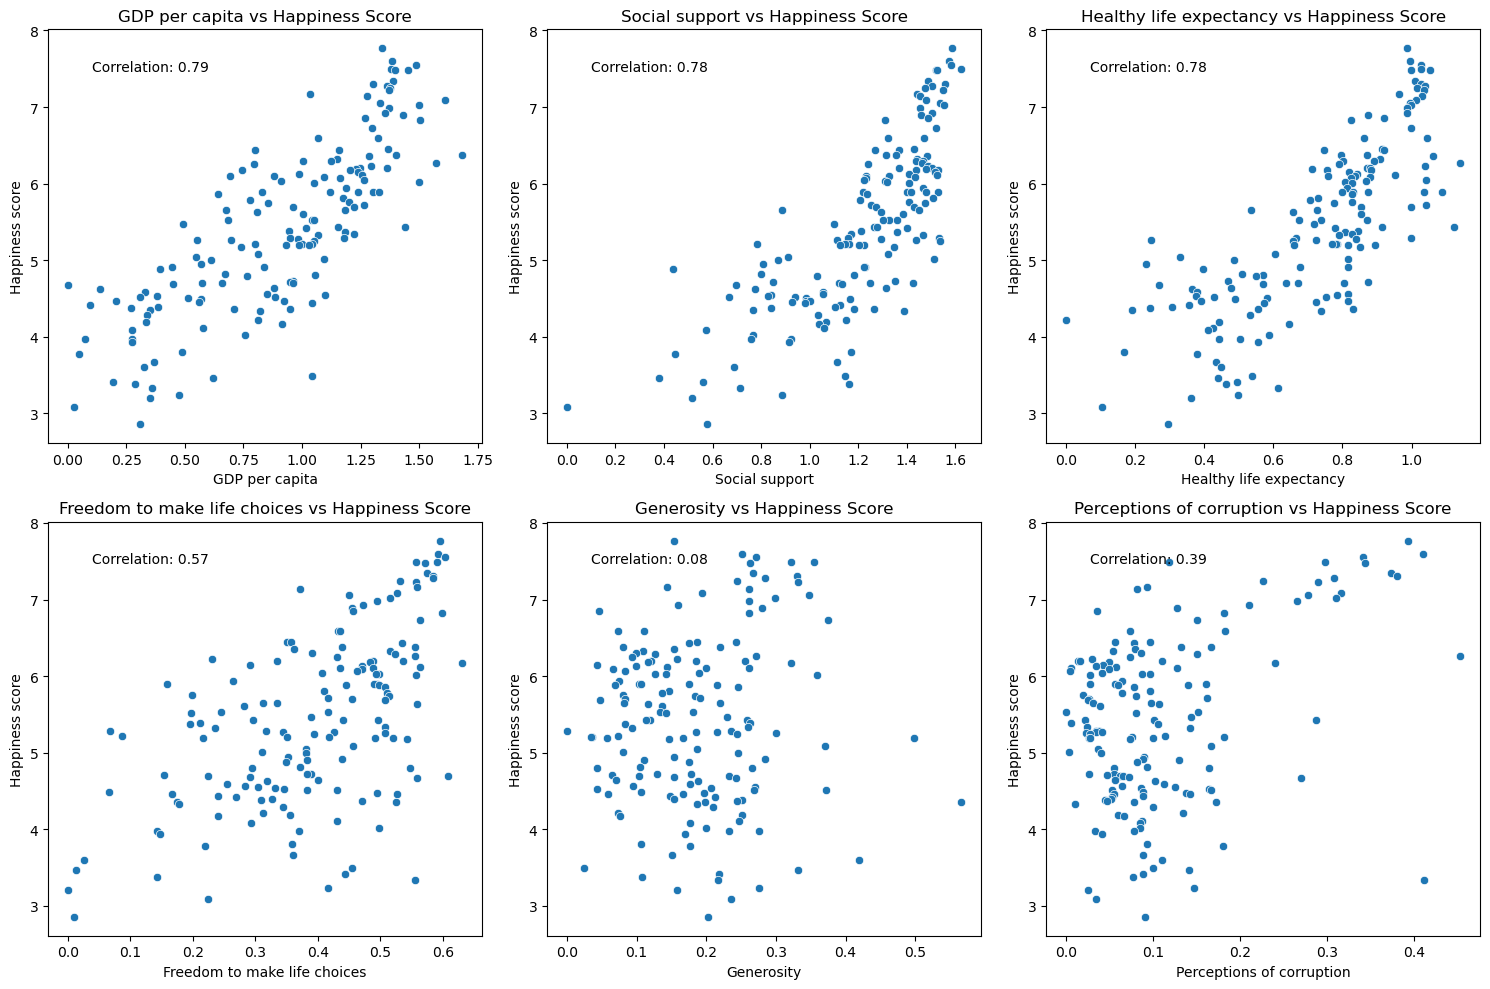

In [10]:
factors_full = ['Explained by: GDP per capita', 'Explained by: Social support', 
                'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                'Explained by: Generosity', 'Explained by: Perceptions of corruption']
factors_short = [factor.split(': ')[1] for factor in factors_full]  # Keep only the part after "Explained by:"
happiness_score = 'Happiness score'

plt.figure(figsize=(15, 10))

# subplots for each factor
for i, (factor_full, factor_short) in enumerate(zip(factors_full, factors_short), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=merged_data[factor_full], y=merged_data[happiness_score])
    plt.title(f'{factor_short} vs Happiness Score')
    correlation = merged_data[factor_full].corr(merged_data[happiness_score])
    plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10)
    plt.xlabel(factor_short)
    plt.ylabel(happiness_score)

plt.tight_layout()
plt.show()

### Graph 4: This graph is a sample exploring the food dataset.  

#### The bar graphs shows the 5 most common food items across all countries and the consumption rates all normalized to population size

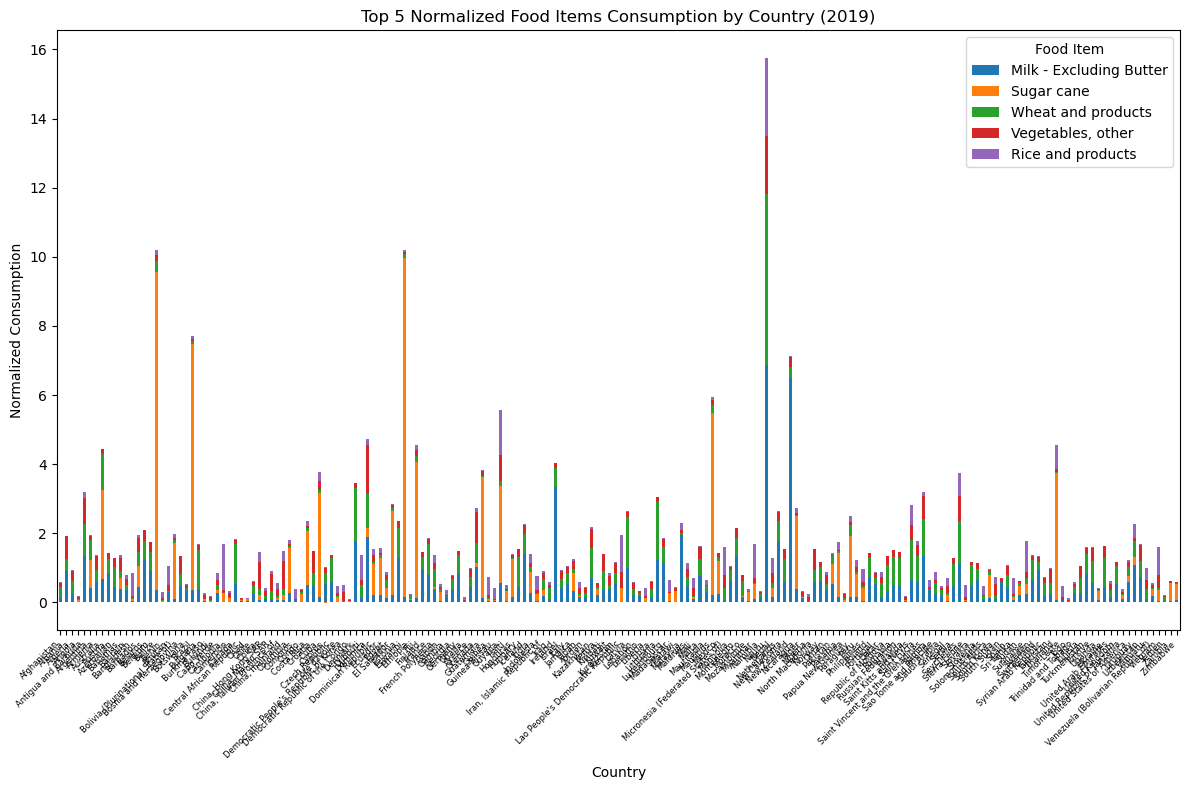

In [11]:
# extract total population
total_population = food_data[food_data['Element'] == 'Total Population - Both sexes'][['Area', 'Value']]
total_population = total_population.rename(columns={'Value': 'Population'})

# merge total population with the rest of the data
selected_data = pd.merge(food_data, total_population, on='Area', how='left')

# exclude the row corresponding to population when calculating normalized consumption
selected_data = selected_data[selected_data['Element'] != 'Total Population - Both sexes']

# calc normalized consumption by dividing food quantity by total population
selected_data['Normalized_Value'] = selected_data['Value'] / selected_data['Population']

# group data by country and item and calculate total normalized consumption
country_diet_totals = selected_data.groupby(['Area', 'Item'])['Normalized_Value'].sum().reset_index()

# pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# plot a bar chart for the top N items
top_n = 5
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top {} Normalized Food Items Consumption by Country (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.xticks(rotation=45, ha='right', fontsize=6)  # Rotate labels for readability and adjust font size

plt.tight_layout()
plt.show()


### Graph 5: This graph displays the 10 most common food items across the 20 happiest countries

#### Just by visually comparing the two graphs you can see that in the happier countries, the most common food item milk while in the least happy countries the most common food item is sugar.

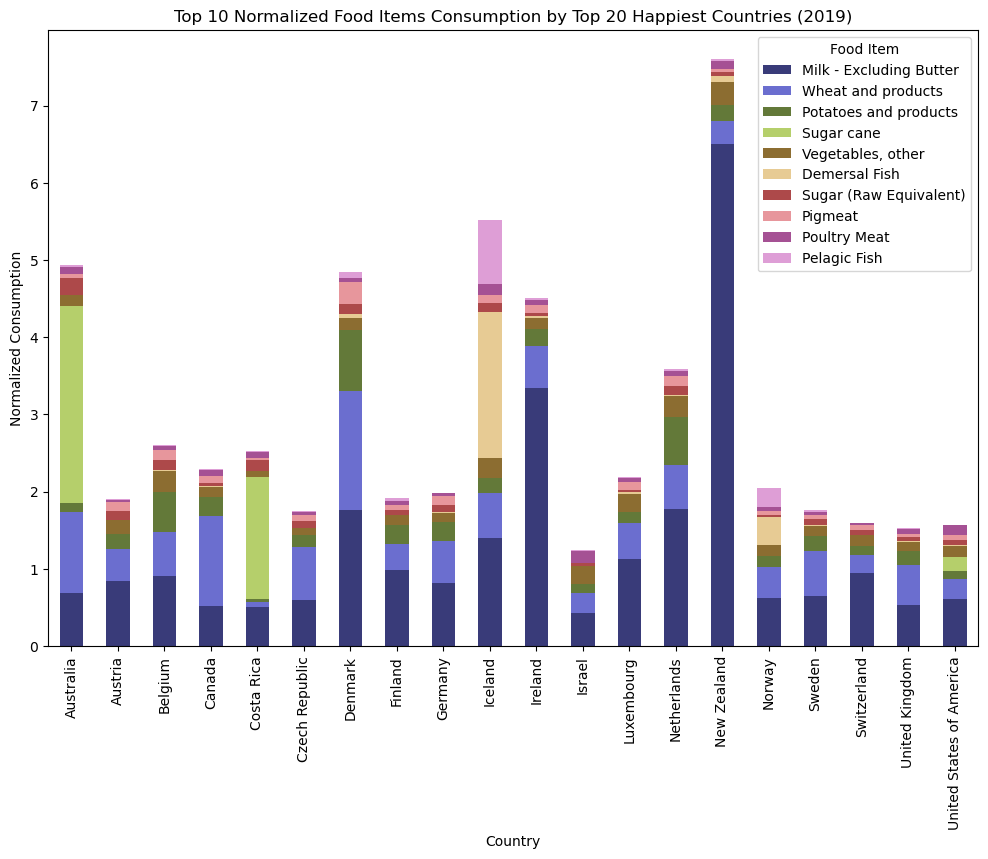

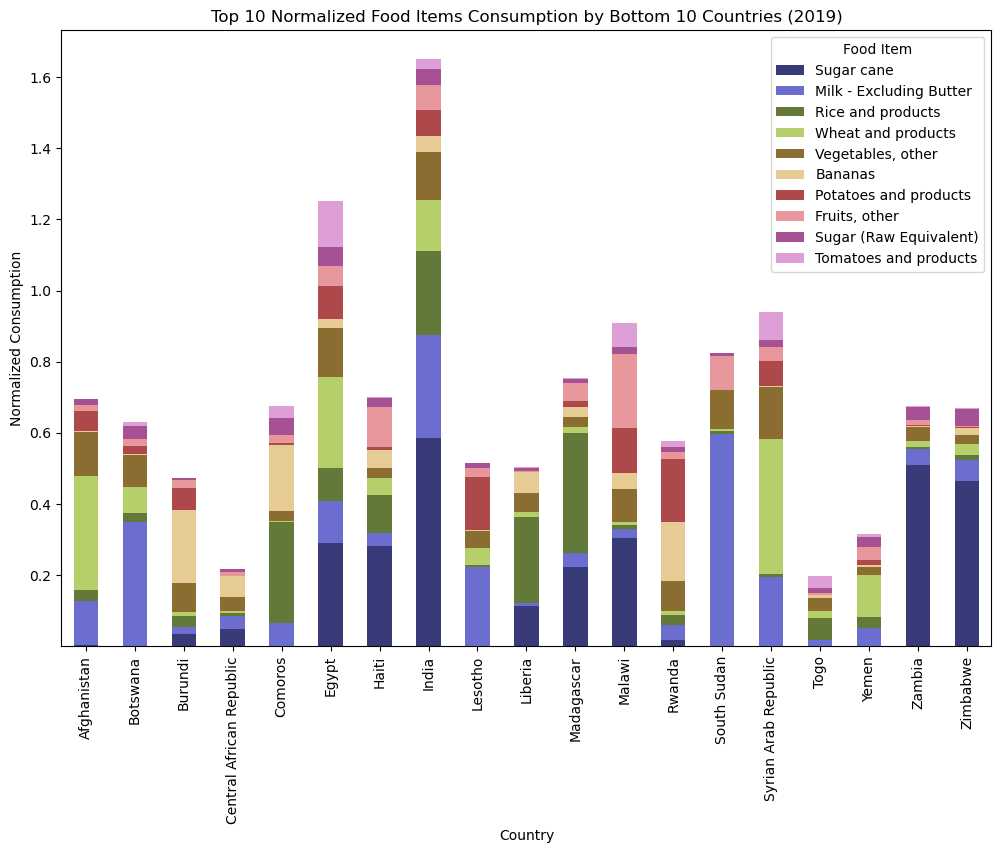

In [12]:
# find the top 20 countries based on happiness score
top_20_countries = happiness_data.nlargest(20, 'Happiness score')['Country']

# filter the country_diet_totals DataFrame for the top 10 countries
filtered_country_diet_totals = country_diet_totals[country_diet_totals['Area'].isin(top_20_countries)]

# pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = filtered_country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

# plot a bar chart for the top N items (you can change N)
top_n = 10
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

color_palette = 'tab20b'
pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=color_palette)
plt.title('Top {} Normalized Food Items Consumption by Top 20 Happiest Countries (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.show()

# find the bottom 20 countries based on happiness score
bottom_20_countries = happiness_data.nsmallest(20, 'Happiness score')['Country']

# filter the country_diet_totals DataFrame for the top 10 countries
filtered_country_diet_totals = country_diet_totals[country_diet_totals['Area'].isin(bottom_20_countries)]

# pivot the table to have countries as rows, items as columns, and values as entries
pivoted_table = filtered_country_diet_totals.pivot(index='Area', columns='Item', values='Normalized_Value').fillna(0)

top_n = 10
top_items = pivoted_table.sum(axis=0).sort_values(ascending=False).head(top_n).index
pivoted_table_top_n = pivoted_table[top_items]

color_palette = 'tab20b'
pivoted_table_top_n.plot(kind='bar', stacked=True, figsize=(12, 8), colormap=color_palette)
plt.title('Top {} Normalized Food Items Consumption by Bottom 10 Countries (2019)'.format(top_n))
plt.xlabel('Country')
plt.ylabel('Normalized Consumption')
plt.legend(title='Food Item')
plt.show()

### Table 1: This table displays the 10 food items most correlated with happiness

#### You can see that the items with the highest correlations are cream, coffee, and bovine meat.

In [13]:
correlations_list = []

# calc the correlation for each food item 
for food_item in final_merged_data['Item'].unique():
    food_item_data = final_merged_data[final_merged_data['Item'] == food_item]
    correlation = food_item_data['Value'].corr(food_item_data['Happiness score'])
    correlations_list.append({'Food Item': food_item, 'Correlation with Happiness': correlation})

correlations_df = pd.DataFrame(correlations_list)

# sort the correlations in descending order to find the most correlated food items
correlations_sorted = correlations_df.sort_values(by='Correlation with Happiness', ascending=False)

top_correlated_food_items = correlations_sorted.head(10)

print(top_correlated_food_items)



                          Food Item  Correlation with Happiness
31                            Cream                    0.283109
23              Coffee and products                    0.128375
25                      Bovine Meat                    0.123790
19          Pineapples and products                    0.105301
24         Cocoa Beans and products                    0.099957
28                     Poultry Meat                    0.099090
21  Grapes and products (excl wine)                    0.077750
35                    Demersal Fish                    0.076489
4                        Sugar cane                    0.057497
7                 Nuts and products                    0.051341


### Table 2: This table displays the 10 food items least correlated with happiness

#### You can see that the items with the lowest correlations are sugar, plaintains, and beans.

In [14]:
correlations_list = []

# calc the correlation for each food item 
for food_item in final_merged_data['Item'].unique():
    food_item_data = final_merged_data[final_merged_data['Item'] == food_item]
    correlation = food_item_data['Value'].corr(food_item_data['Happiness score'])
    correlations_list.append({'Food Item': food_item, 'Correlation with Happiness': correlation})

correlations_df = pd.DataFrame(correlations_list)

# sort the correlations in ascending order to find the most correlated food items with low happiness
correlations_sorted = correlations_df.sort_values(by='Correlation with Happiness', ascending=True)

top_correlated_food_items_low_happiness = correlations_sorted.head(10)
print(top_correlated_food_items_low_happiness)

                Food Item  Correlation with Happiness
40  Sugar non-centrifugal                   -0.210093
17              Plantains                   -0.124046
6                   Beans                   -0.108975
2       Rice and products                   -0.082177
16                Bananas                   -0.078553
10                 Onions                   -0.062601
20                  Dates                   -0.059219
0              Population                   -0.049674
22          Fruits, other                   -0.049597
34        Freshwater Fish                   -0.049047


## Modeling and Analysis

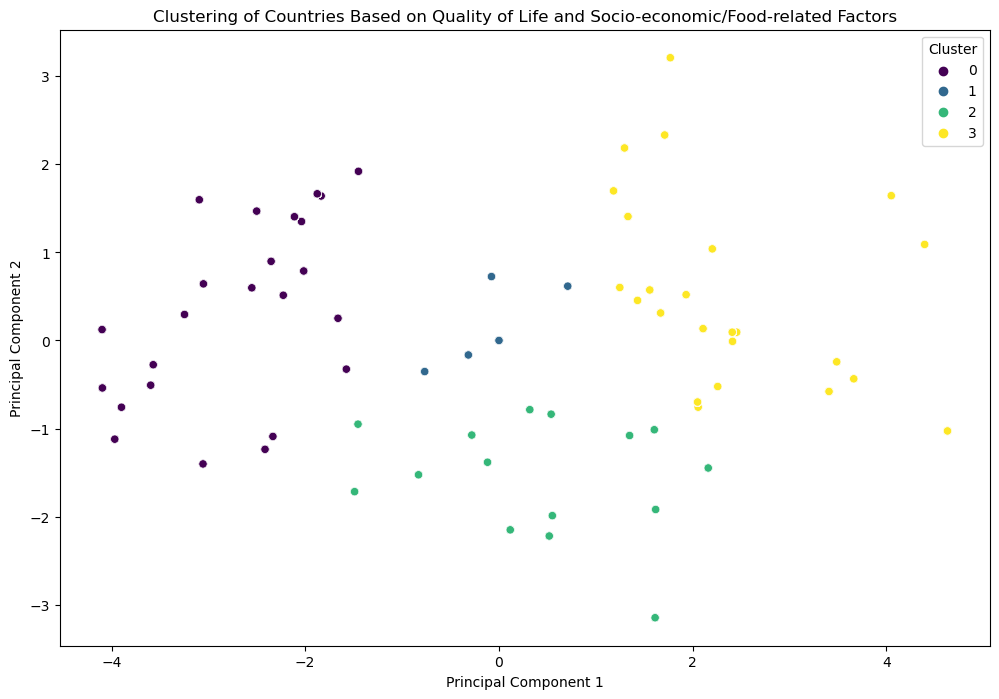

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer 

# extract relevant features for clustering
features_for_clustering = [
    'Quality of Life Index',
    'Cost of Living Index',
    'Property Price to Income Ratio',
    'Traffic Commute Time Index'
]

clustering_data = final_merged_data[features_for_clustering]

# handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
clustering_data_imputed = imputer.fit_transform(clustering_data)

# standardize the imputed data
scaler = StandardScaler()
clustering_data_standardized = scaler.fit_transform(clustering_data_imputed)

num_clusters = 4

# apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
final_merged_data['Cluster'] = kmeans.fit_predict(clustering_data_standardized)

# visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data_standardized)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = final_merged_data['Cluster']

final_merged_data['Cluster'] = kmeans.fit_predict(clustering_data_standardized)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=reduced_df, palette='viridis', legend='full')
plt.title('Clustering of Countries Based on Quality of Life and Socio-economic/Food-related Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Graph 6: This graph displays a  map of the world, where countries are grouped into clusters based on certain socio-economic and quality of life factors.

Each cluster is represented by a distinct color on the map, with a corresponding legend to help interpret the colors. The figure also includes red points that mark the centroids of each country within its respective cluster, calculated based on the geographical shape of each country.


/tmp/ipykernel_75349/136115773.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
/tmp/ipykernel_75349/136115773.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids['geometry'] = centroids['geometry'].centroid


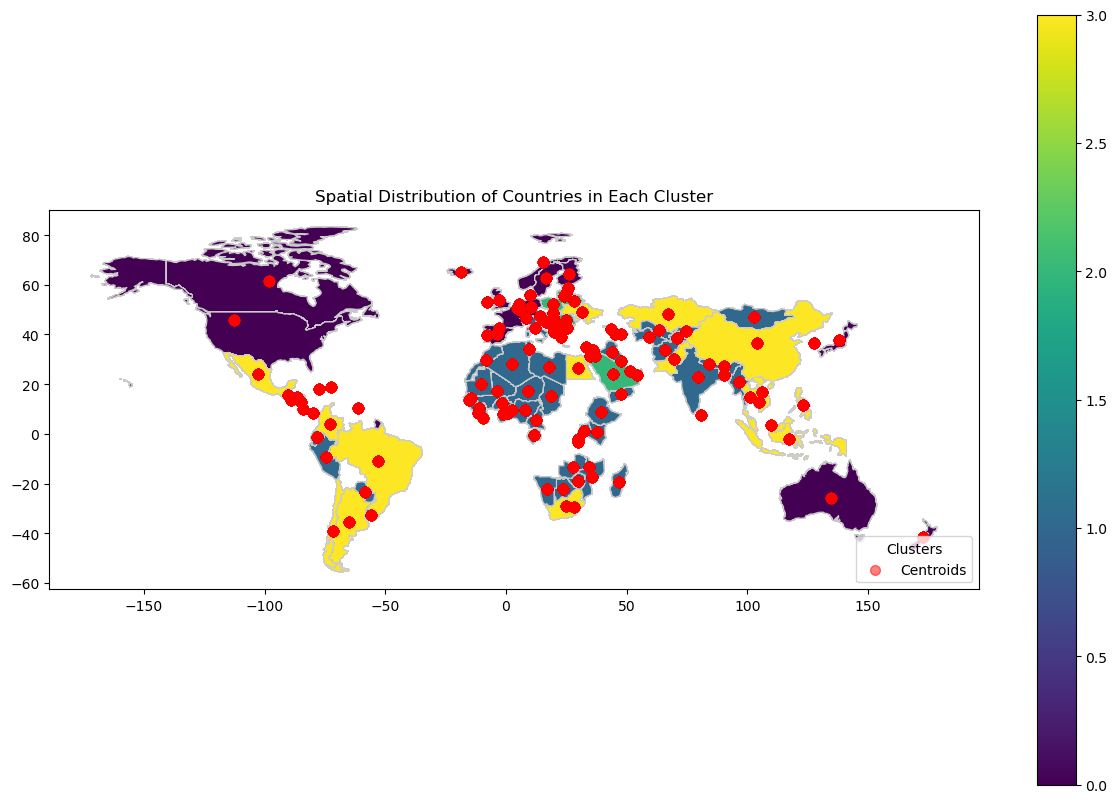

In [16]:
import geopandas as gpd
from shapely.geometry import Point

# load the world map data from GeoPandas datasets
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_map = world_map.merge(final_merged_data, left_on='name', right_on='Country', how='inner')

centroids = world_map.copy()
centroids['geometry'] = centroids['geometry'].centroid

fig, ax = plt.subplots(figsize=(15, 10))
world_map.plot(column='Cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
centroids.plot(ax=ax, color='red', alpha=0.5, markersize=50, label='Centroids')

ax.legend(title='Clusters', loc='lower right')

plt.title('Spatial Distribution of Countries in Each Cluster')
plt.show()


## Conclusions and Discussion

### Analysis

#### Model Selection Rationale


This investigation used prediction models and clustering algorithms to address the central topic of the impact of dietary components, quality of life, and socioeconomic status on well-being. The necessity to fully represent the complex interplay of various variables in happiness determinants, as demonstrated by Figure 6, led to the selection of these models in particular.


### Conclusions / Future Expansion

The outcomes validate our research questions. Figures 1 and 2 show a substantial association between happiness scores and quality of life measures, confirming the importance of these aspects in assessments of well-being. This investigation focused on the relationship between diet and happiness, and found that certain dietary components were significantly associated with greater happiness levels (Tables 1 and 2).

These findings are constrained by the features of the datasets. The extent of the dataset and the possibility of bias could limit how broadly applicable our results can be. Further research, including utilizing a wider range of data, is necessary to substantiate and broaden our findings. Further exploration of the diet factors would allow for more concrete conclusions. Currently we can't say if the food items that are correlated with happiness have anything to do with physical health or if these are simply higher cost food items (further uph Our study highlights the complex link between lifestyle factors and happiness, laying the foundation for future investigations of this kind.